In [6]:
import sys
from tqdm import trange
import autograd.numpy as np
import autograd
from mlrefined_libraries.math_optimization_library import static_plotter
import matplotlib.pyplot as plt

In [7]:
plotter = static_plotter.Visualizer()
sys.path.append('../')

In [8]:
class Linear_regression(object):
    def __init__(self, data_set):
        self.x = data_set[:,1:-1].T
        self.y = data_set[:,-1:].T
        self.w0 = self.decent_initializer()
        self.data_initialization(data_set)

    def data_initialization(self, data_set):
        # The whole data processing piplne
        x_mean = np.nanmean(self.x, axis=1)
        x = self.data_recovery(self.x, x_mean)
        self.deviation_regulartor()
        self.x_mean = x.mean(axis=1)[:, np.newaxis]
        self.data_normalization(x)

    def data_normalization(self, x):
        # Generate the normalization function
        normalize = lambda x: (x - self.x_mean) / self.x_std
        self.x = normalize(x)
        return normalize

    def deviation_regulartor(self):
        self.x_std = self.x.std(axis=1)[:, np.newaxis]
        regulator = np.zeros(self.x_std.shape)
        for i in range(len(self.x_std)):
            if self.x_std[i] <= 0.1:
                regulator[i] = 1.0
                self.x_std += regulator
            else:
                pass

    def decent_initializer(self):
        w = 0.1 * np.random.randn(self.x.shape[0] + 1, 1)
        return w

    @staticmethod
    def data_recovery(x, mean):
        """
        To replace the NAN data in the dataset with the corresponding mean value
        :return: The restored data set x

        """
        for i in np.argwhere(np.isnan(x) == True):
            x[i[0], i[1]] = mean[i[0]]
        return x

    def linear_model(self, w):
        a = w[0] + np.dot(self.x.T, w[1:])
        return a.T

    def least_squares_mean(self, w):
        cost = np.sum((self.linear_model(w) - self.y) ** 2)
        return cost / float(np.size(self.y))

    def least_absolute_deviations(self, w):
        cost = np.sum(np.abs(self.linear_model(w) - self.y))

        return cost / float(np.size(self.y))

    def gradient_decent(self, Loss_function, study_rate, iteration):
        """
        Gradient decent to minimize the cost function
        """
        if Loss_function == 'LSM':
            Loss_fun = self.least_squares_mean
        elif Loss_function == 'LAD':
            Loss_fun = self.least_absolute_deviations
        else:
            raise Exception("Error Function Name")
        w = self.w0
        Gradient = autograd.grad(Loss_fun)
        weight_history = [w]
        cost_history = [Loss_fun(w)]
        for k in trange(1, iteration + 1):
            study_rate=study_rate*0.99
            grad_decent = Gradient(w)
            w = w - study_rate * grad_decent
            weight_history.append(w)
            cost_history.append(Loss_fun(w))
        if Loss_function == "LSM":
            cost_history = [cost ** 0.5 for cost in cost_history]
        return weight_history, cost_history, w


    def linear_fitting_plot(self,w):
        """
        plot the scatter plot with the linear fitting line
        """
        x=self.x
        y=self.y
        x_axis = np.linspace(np.min(x), np.max(x))
        y_axis = w[0] + w[1] * x_axis

        plt.title('Linear Fit for Discrete Data Points')
        plt.xlabel('$log_{(mass)}\ (Kg)$')
        plt.ylabel('$log_{(metabolic rate)}\ (J)$')
        plt.plot(x_axis, y_axis, color='r')
        plt.scatter(x, y, color='b', edgecolor='w')
        plt.show()


100%|██████████| 500/500 [00:27<00:00, 18.50it/s]


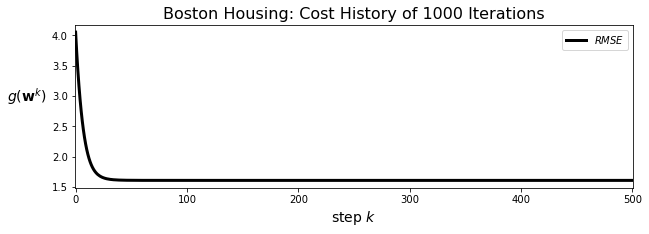

[[ 3.70658218]
 [-0.35590948]
 [ 0.07752402]]


In [9]:
    begin_point = 0
    data_bh = np.loadtxt('../Homework2/attr.csv', delimiter=',')
    BH = Linear_regression(data_bh)

    weight_history_BH_LSM, cost_history_BH_LSM, w = BH.gradient_decent('LSM', study_rate=0.05,
                                                                    iteration=500)

    plotter.plot_cost_histories(histories=[cost_history_BH_LSM], start=begin_point,
                                labels=['$ RMSE $', '$ MAD $'],
                                title="Boston Housing: Cost History of 1000 Iterations")
    print(w)
# DVD 3   BOOK 1 Music 2 video 4